<table>
  <tr><td>
    <img src="h10.png">
  </td></tr>
<table>

# Latar Belakang Projek



Bearing merupakan salah satu komponen penting pada sebuah mesin atau alat-alat industri lainnya. Pada waktu tertentu bearing akan mengalami kerusakan. Perusahaan membutuhkan analisis yang tepat untuk mengetahui penyebab kerusakan dari bearing tersebut. Manusia mungkin sangat bisa melakukan tugas ini dengan mudah, namun bagaimana jika bearing yang pelu dicek ada sangat banyak? Diperlukan mesin yang dapat mendeteksi penyebab kerusakan secara otomatis melalui kemampuan visual(gambar). Dataset yang digunakan disini adalah dataset bearing dengan 4 kelas yaitu: 

1. `Brinelling` : Kerusakan brineling akibat brinelling
2. `Corosion` : Kerusakan brineling akibat korosi
3. `Good` : Bearing yang masih bagus
4. `Scratch` . : Kerusakan brineling akibat goresan

# Masalah Yang bisa Dijawab
Bagaimana caranya membangun model ML untuk melakukan klasifikasi kerusakan Bearing secara otomatis menggunakan data gambar?

# Tahap - Tahap Klasifikasi Gambar

1. Mengakses Dataset
2. Data Preparation
3. Pembangunan Model CNN
4. Pelatihan Model CNN
5. Evaluasi Model CNN
6. Uji Coba Model

# Mengakses Dataset

Menyiapkan folder untuk data gambar Brinelling, Corosion, Good, dan Scratch

In [ ]:
from google.colab import drive
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 
fold_brinelling = os.path.join('/content/gdrive/My Drive/CNN_BEARING/brinelling')  #Mendefinisikan Folder Training untuk gambar brinelling
fold_corosion  = os.path.join('/content/gdrive/My Drive/CNN_BEARING/corosion')     #Mendefinisikan Folder Training untuk gambar corosion
fold_good      = os.path.join('/content/gdrive/My Drive/CNN_BEARING/good')         #Mendefinisikan Folder Training untuk gambar good
fold_scratch   = os.path.join('/content/gdrive/My Drive/CNN_BEARING/scratch')      #Mendefinisikan Folder Training untuk gambar scratch

print('Jumlah total gambar brinelling:', len(os.listdir(fold_brinelling)))         #Menampilkan jumlah gambar di dalam folder brineling
print('Jumlah total gambar corosion:', len(os.listdir(fold_corosion)))             #Menampilkan jumlah gambar di dalam folder corosion
print('Jumlah total gambar good:', len(os.listdir(fold_good)))                     #Menampilkan jumlah gambar di dalam folder brineling
print('Jumlah total gambar scratch:', len(os.listdir(fold_scratch)))               #Menampilkan jumlah gambar di dalam folder corosion

print("Menampilkan nama file gambar:")                                     
file_brinelling = os.listdir(fold_brinelling)                                      #Mendaftar file di dalam folder brineling
print("brinelling:",file_brinelling[:5])                                           #Menampilkan nama 5 file pertama di dalam folder brineling

file_corosion = os.listdir(fold_corosion)                                          #Mendaftar file di dalam folder corosion
print("corosion:",file_corosion[:5])                                               #Menampilkan nama 5 file pertama di dalam folder corosion

file_good = os.listdir(fold_good)                                                  #Mendaftar file di dalam folder good
print("good:",file_good[:5])                                                       #Menampilkan nama 5 file pertama di dalam folder corosion

file_scratch = os.listdir(fold_scratch)                                            #Mendaftar file di dalam folder scratch
print("scratch:",file_corosion[:5])                                                #Menampilkan nama 5 file pertama di dalam folder corosion

Jumlah total gambar brinelling: 130
Jumlah total gambar corosion: 130
Jumlah total gambar good: 130
Jumlah total gambar scratch: 130
Menampilkan nama file gambar:
brinelling: ['brinelling_101.jpg', 'brinelling_0.jpg', 'brinelling_10.jpg', 'brinelling_100.jpg', 'brinelling_1.jpg']
corosion: ['corrosion_0.jpg', 'corrosion_109.jpg', 'corrosion_10.jpg', 'corrosion_102.jpg', 'corrosion_101.jpg']
good: ['good_0.jpg', 'good_10.jpg', 'good_1.jpg', 'good_108.jpg', 'good_104.jpg']
scratch: ['corrosion_0.jpg', 'corrosion_109.jpg', 'corrosion_10.jpg', 'corrosion_102.jpg', 'corrosion_101.jpg']


Menampilkan gambar Brinelling, Corosion, Good, dan Scratch dalam satu tampilan

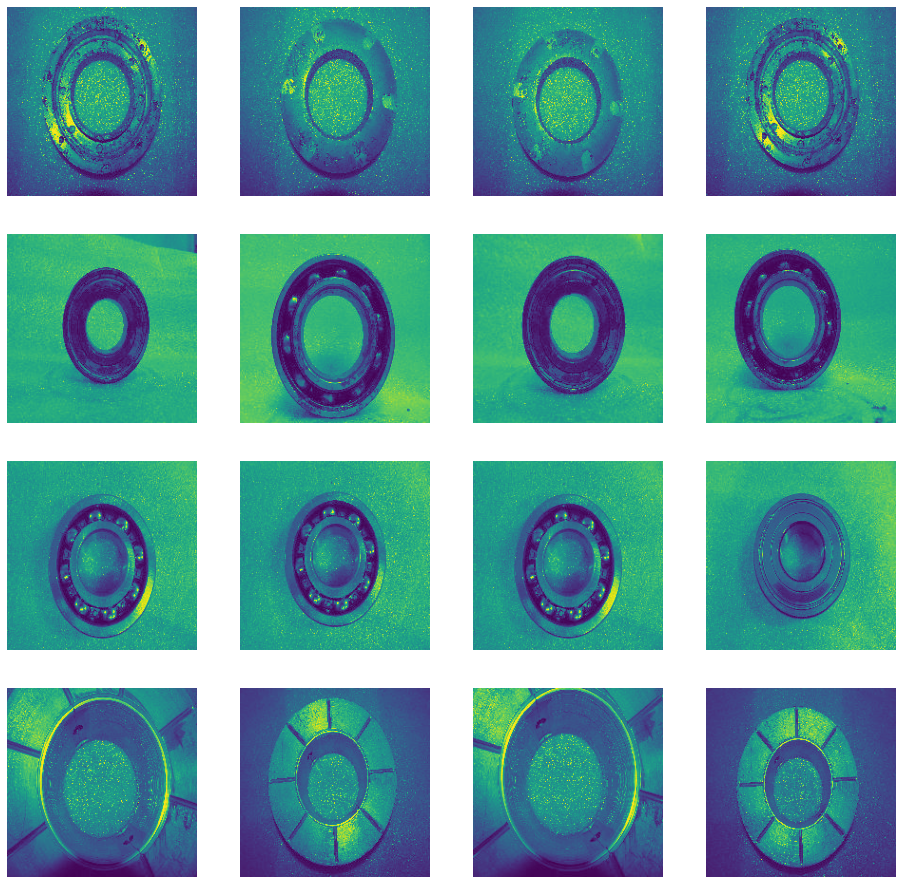

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 4                                                                         #Jumlah baris tampilan gambar sejumlah artist
ncols = 4                                                                         #Jumlah kolom tampilan gambar
pic_index = 0                                                                     #Index awal untuk iterasi gambar
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*4 gambar
pic_index += 4                                                                    #Index akan bertambah  4 setiap baris
gbr_tampil_brinelling = [os.path.join(fold_brinelling, fname)                     #Menampilkan gambar 1
                      for fname in file_brinelling[pic_index-4:pic_index]]
gbr_tampil_corosion   = [os.path.join(fold_corosion, fname)                       #Menampilkan gambar 2
                      for fname in file_corosion[pic_index-4:pic_index]]
gbr_tampil_good      = [os.path.join(fold_good, fname)                            #Menampilkan gambar 3
                      for fname in file_good[pic_index-4:pic_index]]
gbr_tampil_scratch  = [os.path.join(fold_scratch, fname)                          #Menampilkan gambar 4
                      for fname in file_scratch[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_brinelling+gbr_tampil_corosion+gbr_tampil_good+gbr_tampil_scratch):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Data Preparation

## Menggunakan Image Generator

Mengimpor modul yang digunakan

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator
import time                                                                       #Mengimpor times
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib

## Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validation

Dimana Data akan saya kelompokkan menjadi Data Training dan Data Validasi, masing-masing folder tersebut masih juga terbagi ke dalam folder Brineling, Corosion, Good dan Scartch kemudian dilakukan pelabelan menggunakan Image Generator.

![alt text](https://drive.google.com/uc?id=19efhzfaBKtOXTFbFOcaDuFCmzqUA-Fe6)

In [ ]:
BASIS_DIR = "/content/gdrive/My Drive/CNN_BEARING"                               #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                          #Menerapkan skenario rotasi gambar hingga 40 derajat          
      width_shift_range=0.2,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.2,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat 
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<      
      validation_split=0.2                                                       #80% Data Training, 20% Data Validasi
      )

Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(200,200),                                                          #Mengubah resolusi seluruh gambar menjadi  piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(200,200),                                                          #Mengubah resolusi seluruh gambar menjadi 200x200 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 416 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


# Pembangunan Model CNN

## Membangun Model Jaringan Saraf Konvolusi

Model yang digunakan adalah model **Sequential**

In [ ]:
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 200 x 200 dengan 3 byte warna
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)), 
                                                                                  #Layer Konvolusi pertama
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                         #Layer Konvolusi keempat
   
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1024, activation='relu'),                               #Hiden layer pertama dengan 1024 neuron
    
    tf.keras.layers.Dense(4, activation='softmax')                                #Layer output
])

model.summary()                                                                   #Menampilkan summary model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 141376)            0

Melakukan Kompilasi Model

In [ ]:
#opt = tf.keras.optimizers.RMSprop(learning_rate=2)                            #Menentukan learning rate

#RMSprop (atas) rmsprop, ADAM adam, SGD, Ftrl
model.compile(loss = 'categorical_crossentropy',                               #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='Adam',                                                #Fungsi optimizer
              metrics=['accuracy'])                                            #Menampilkan akurasi model training

# Pelatihan Model CNN

## Melatih Model Jaringan Saraf Tiruan

In [ ]:
class WaktuTraining(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

callbacks = WaktuTraining()

In [ ]:
history=model.fit(
    train_generator,                                                              #Data training hasil generasi
    steps_per_epoch=2,                                                            #Jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=50,                                                                    #Jumlah perulangan komputasi(epoch)
    validation_data=validation_generator,                                         #Menampilkan akurasi pengujian data validasi
    validation_steps=4,                                                           #Jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/50
2/2 - 103s - loss: 3.7404 - accuracy: 0.1562 - val_loss: 4.1387 - val_accuracy: 0.2500
Epoch 2/50
2/2 - 32s - loss: 2.9936 - accuracy: 0.2344 - val_loss: 1.4414 - val_accuracy: 0.3558
Epoch 3/50
2/2 - 23s - loss: 1.4058 - accuracy: 0.2031 - val_loss: 1.3820 - val_accuracy: 0.2500
Epoch 4/50
2/2 - 18s - loss: 1.3786 - accuracy: 0.2500 - val_loss: 1.3296 - val_accuracy: 0.3077
Epoch 5/50
2/2 - 15s - loss: 1.2943 - accuracy: 0.5156 - val_loss: 1.1740 - val_accuracy: 0.4808
Epoch 6/50
2/2 - 17s - loss: 1.1138 - accuracy: 0.4844 - val_loss: 1.0071 - val_accuracy: 0.5865
Epoch 7/50
2/2 - 12s - loss: 0.9509 - accuracy: 0.5156 - val_loss: 0.8768 - val_accuracy: 0.5865
Epoch 8/50
2/2 - 8s - loss: 0.7699 - accuracy: 0.6406 - val_loss: 0.8853 - val_accuracy: 0.5481
Epoch 9/50
2/2 - 4s - loss: 0.9074 - accuracy: 0.4219 - val_loss: 0.8082 - val_accuracy: 0.5192
Epoch 10/50
2/2 - 7s - loss: 0.7967 - accuracy: 0.5938 - val_loss: 0.7041 - val_accuracy: 0.6923
Epoch 11/50
2/2 - 5s - loss: 0.

In [ ]:
Waktu_Training = callbacks.times
print('Waktu Training=', sum(Waktu_Training), "detik")

Waktu Training= 219.48956608772278 detik


In [ ]:
waktu_Training = callbacks.times
print('Waktu Training=', sum(Waktu_Training[0:19]), "detik")

Waktu Training= 146.5630967617035 detik


# Evaluasi Model CNN

## Ploting Akurasi dan Loss Training dan Validasi

Melihat pergerakan besaran nilai akurasi dan loss dari Training dan Validasi

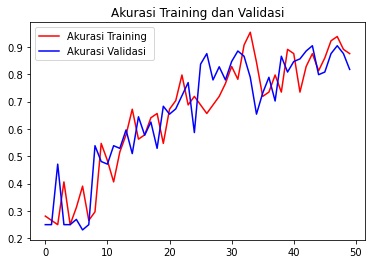

<Figure size 432x288 with 0 Axes>

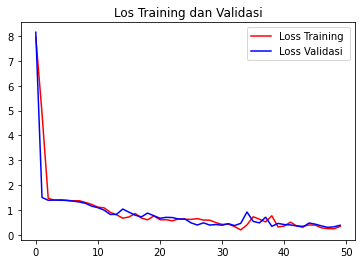

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training ')                               #Plot nilai akurasi training                     
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                            #Plot nilai akurasi validasi
plt.title('Los Training dan Validasi')                                            #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

Menyimpan Hasil Training Dalam Excell File

In [ ]:
import pandas as pd
nama=['akurasi tarining', 'loss training', 'akurasi validasi', 'loss validasi']
acc1 = history.history['accuracy']                                                #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

nama=['akurasi training','loss training', 'akurasi validasi', 'loss validasi']

df = pd.DataFrame(list(zip(acc1, loss, val_acc, val_loss)), columns =nama)

df.to_excel('training_result.xlsx')

,akurasi training,loss training,akurasi validasi,loss validasi
0,0.281250,7.968714,0.250000,8.159995
1,0.265625,4.892650,0.250000,1.500553
2,0.250000,1.462480,0.471154,1.385575
3,0.406250,1.389334,0.250000,1.396132
4,0.250000,1.404624,0.250000,1.389053
5,0.312500,1.384380,0.269231,1.378303
6,0.390625,1.364523,0.230769,1.352669
7,0.265625,1.368694,0.250000,1.316995
8,0.296875,1.299160,0.538462,1.263045
9,0.546875,1.220292,0.480769,1.149655


## Confussion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_generator(validation_generator, steps=4)
predicted_classes = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, predicted_classes))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[8 9 3 6]
 [8 7 5 6]
 [7 6 9 4]
 [7 9 6 4]]


## Classification Report

In [ ]:
print('Classification Report')
target_names = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
report = classification_report(target_names, predicted_classes, target_names=class_labels)
print(report) 

Classification Report
              precision    recall  f1-score   support

  brinelling       0.27      0.31      0.29        26
    corosion       0.23      0.27      0.25        26
        good       0.39      0.35      0.37        26
     scratch       0.20      0.15      0.17        26

    accuracy                           0.27       104
   macro avg       0.27      0.27      0.27       104
weighted avg       0.27      0.27      0.27       104



# Uji Coba Model Klasifikasi Gambar

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar Brinelling, Corosion, Good, dan Scratch

Using TensorFlow backend.


Saving brinelling_9.png to brinelling_9.png
brinelling_9.png
Gambar bearing dengan kategori Brinelling


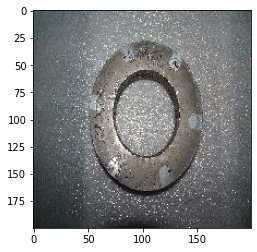

In [ ]:
import numpy as np                                                                #Mengimpor modul numpy
from google.colab import files                                                    #Mengimpor modul import file
from keras.preprocessing import image                                             #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                         #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(200, 200))                              #Mengubah ukuran gambar menjadi 200x200 piksel
  imgplot = plt.imshow(img)                                                       #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Gambar bearing dengan kategori Brinelling')                            #Jika gambar adalah laher dengan kategori Brinelling, tampilkan tulisan "Brinelling"
  elif classes[0][1]==1:
    print('Gambar bearing dengan kategori Corosion')                              #Jika gambar adalah laher dengan kategori Corosion, tampilkan tulisan "Corosion"
  elif classes[0][2]==1:
    print('Gambar bearing dengan kategori Good')                                  #Jika gambar adalah laher dengan kategori Good, tampilkan tulisan "Good"
  elif classes[0][3]==1:
    print('Gambar bearing dengan kategori Scratch')                               #Jika gambar adalah laher dengan kategori Scratch, tampilkan tulisan "Scratch"
  else:
    print('Tidak Diketahui')                                                      #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"